In [1]:
# author     : Enes Çavuş
# date       : July 2021
# subject    : machine learning with activity dataset
# datasource : https://archive.ics.uci.edu/ml/datasets/Activity+recognition+with+healthy+older+people+using+a+batteryless+wearable+sensor

In [2]:
# import modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

# sklearn for machine learning and preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score

from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import os
# path operations
DIRECTORY_PATH = "/"
DATASET_PATH = "dataset/Dataset"

In [3]:
# dataset path organizing
seperated_dataset_files = os.listdir(DATASET_PATH)
print(len(seperated_dataset_files))
currtent_file = seperated_dataset_files[0]
print(DATASET_PATH + "/" + currtent_file)

61
dataset/Dataset/d1p51F


In [4]:
# creating dataset with new column names
df_list = list()
for data in range(len(seperated_dataset_files)-1):
    path = DATASET_PATH + "/" + seperated_dataset_files[data]
    df = pd.read_csv(path,
                 header=None,
                 names=['time', 'frontal_axis','vertical_axis', 'lateral_axis','antennaID', 'signalStrength','phase', 'Frequency','activity'])
    df_list.append(df)
# print(df_list)
combined_data = pd.concat(df_list,ignore_index=True, sort=False)
combined_data.head(50)

,time,frontal_axis,vertical_axis,lateral_axis,antennaID,signalStrength,phase,Frequency,activity
0,0.0,0.096148,1.0197,-0.19613,1,-42.5,2.055500,924.25,4.0
1,0.025,0.096148,1.0197,-0.19613,1,-42.5,2.055500,924.25,4.0
2,0.05,0.096148,1.0197,-0.19613,1,-42.5,2.055500,924.25,4.0
3,0.075,0.096148,1.0197,-0.19613,1,-42.5,2.055500,924.25,4.0
4,0.1,0.096148,1.0197,-0.19613,1,-42.5,2.055500,924.25,4.0
5,0.125,0.096148,1.0197,-0.19613,1,-42.5,2.055500,924.25,4.0
6,0.25,0.23685,0.93932,-0.093505,1,-44.0,1.102900,920.75,4.0
7,0.3,0.23685,0.93932,-0.093505,1,-44.0,1.102900,920.75,4.0
8,0.325,0.23685,0.93932,-0.093505,1,-44.0,1.102900,920.75,4.0
9,0.35,0.23685,0.93932,-0.093505,1,-44.0,1.102900,920.75,4.0


In [5]:
# dataset copy
df = combined_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52304 entries, 0 to 52303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            52304 non-null  object 
 1   frontal_axis    52286 non-null  object 
 2   vertical_axis   52285 non-null  object 
 3   lateral_axis    52285 non-null  object 
 4   antennaID       52285 non-null  object 
 5   signalStrength  52284 non-null  float64
 6   phase           52284 non-null  float64
 7   Frequency       52284 non-null  float64
 8   activity        52284 non-null  float64
dtypes: float64(4), object(5)
memory usage: 3.6+ MB


In [6]:
# finding non-numeric / categorical columns
df.select_dtypes(include=['object',"category"]).columns

Index(['time', 'frontal_axis', 'vertical_axis', 'lateral_axis', 'antennaID'], dtype='object')

In [7]:
# changing non-numerics to numeric cause cagegorical values are actually numeric - just classified wrong
for column in df.select_dtypes(include=['object',"category"]).columns:
    df[column] = pd.to_numeric(df[column],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52304 entries, 0 to 52303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            52284 non-null  float64
 1   frontal_axis    52284 non-null  float64
 2   vertical_axis   52284 non-null  float64
 3   lateral_axis    52284 non-null  float64
 4   antennaID       52284 non-null  float64
 5   signalStrength  52284 non-null  float64
 6   phase           52284 non-null  float64
 7   Frequency       52284 non-null  float64
 8   activity        52284 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [8]:
# Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating
df.activity.value_counts()

3.0    30837
1.0    15140
2.0     4369
4.0     1938
Name: activity, dtype: int64

In [9]:
print(df.signalStrength.value_counts())
print(df.signalStrength.nunique())

-56.5    4922
-57.0    4912
-57.5    3979
-56.0    3512
-58.0    2992
         ... 
-40.0       3
-40.5       2
-41.0       2
-38.5       2
-39.0       1
Name: signalStrength, Length: 64, dtype: int64
64


In [10]:
print(df.antennaID.value_counts())
print(df.antennaID.nunique())

1.0    21450
4.0    14183
3.0    11940
2.0     4711
Name: antennaID, dtype: int64
4


In [11]:
df.phase.nunique()

3523

In [12]:
# dropping unnecessary or useless columns
df.drop(columns=["lateral_axis","phase","Frequency","signalStrength","time","antennaID"],inplace=True)

In [13]:
#checking correlations bewteen targat and feature values
corr = df.corr()
corr["activity"].sort_values(ascending=False)

activity         1.000000
frontal_axis     0.674311
vertical_axis   -0.769793
Name: activity, dtype: float64

In [14]:
df = df.reset_index()

In [15]:
df = shuffle(df)

In [16]:
# checking NaN values
import numpy as np
np.where(np.isnan(df))

(array([ 4717,  4717,  4717,  8011,  8011,  8011,  9429,  9429,  9429,
        12276, 12276, 12276, 15086, 15086, 15086, 18825, 18825, 18825,
        20687, 20687, 20687, 22312, 22312, 22312, 23795, 23795, 23795,
        26758, 26758, 26758, 30517, 30517, 30517, 33124, 33124, 33124,
        33899, 33899, 33899, 35717, 35717, 35717, 37530, 37530, 37530,
        39634, 39634, 39634, 39839, 39839, 39839, 44606, 44606, 44606,
        48448, 48448, 48448, 51232, 51232, 51232]),
 array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1,
        2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2,
        3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]))

In [17]:
# filling NaN values with theri mean
df.fillna(df.mean(), inplace=True)
np.where(np.isnan(df))

(array([], dtype=int64), array([], dtype=int64))

In [18]:
# downsampling the data for quick operations
downsample_df = df[:10000]

In [19]:
# encoding and splitting
X = downsample_df.drop(columns=["activity"],axis=1)
y = downsample_df["activity"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
# sample model training and getting some insights
svc = SVC(verbose=0)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
# print prediction results
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))

0.9
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       608
           1       0.72      0.40      0.52       162
           3       1.00      1.00      1.00      1153
           4       0.00      0.00      0.00        77

    accuracy                           0.90      2000
   macro avg       0.62      0.59      0.59      2000
weighted avg       0.87      0.90      0.88      2000



In [21]:
# time to work with original/all data
X = df.drop(columns=["activity"],axis=1)
y = df["activity"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
# model training and scores
svc = SVC(verbose=0)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
# print prediction results
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))

0.8979065098938916
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      3047
           1       0.71      0.37      0.48       868
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00      6159
           4       0.67      0.01      0.02       384

    accuracy                           0.90     10461
   macro avg       0.63      0.47      0.47     10461
weighted avg       0.89      0.90      0.88     10461



In [23]:
# trying different models with a pipeline and a litle bit more automatizing
pipe_linear_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(random_state=42, verbose=0))
])

pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=42, verbose=0))
])

In [24]:
# prepearing some grid search parameters for all models
# these paramaters can be manipulated - data dependent

c_range = [0.1, 1,100,1000 ] # [0.1, 1,10,100,1000]  # comment out if you have GPU option or time
kernel = ['linear', 'rbf'] # ['linear', 'poly', 'rbf']
gamma = [1e-2, 1e-3]
degree = [2,3] # [2,3,5]

grid_params_lin_svm = [{
    'clf__C': c_range,
    'clf__penalty': ['l2'] # l1 is mostly not supported with other params
}]

grid_params_svc = [{
    #'clf__kernel': kernel, 
    'clf__C': c_range,
    'clf__gamma' : gamma,
    #'clf__degree': degree
}]

Lin_SVM = GridSearchCV(estimator=pipe_linear_svm,
                       param_grid=grid_params_lin_svm,
                       scoring='accuracy',
                       #n_jobs=-1, # make it multi process
                       cv=3)     # cross validation value


SVC = GridSearchCV(estimator=pipe_svc,
                       param_grid=grid_params_svc,
                       scoring='accuracy',
                       n_jobs=-1, # make it multi process
                       #cv=3
                       )     # cross validation value

# List of pipelines for iterating through each of them
models = [Lin_SVM,SVC]

# Creating a dict for our reference
models_no = {0: 'Linear_SVC', 
            1: 'SVC'}

In [25]:
top_classifier = ''
top_accuracy = 0.000
top_grid = ''

Model : Linear_SVC
Best parameters : {'clf__C': 100, 'clf__penalty': 'l2'}
GRID Accuracy : 0.8776378119751377
Test Accuracy  : 0.8765892362106873 
[array([0.87520015, 0.87548693, 0.87763781, 0.87560646])]
Model : SVC
Best parameters : {'clf__C': 1000, 'clf__gamma': 0.01}
GRID Accuracy : 0.8976651061563583
Test Accuracy  : 0.8974285441162413 
[array([0.87412469, 0.87285805, 0.87553473, 0.87419638, 0.89154697,
       0.87744665, 0.89766511, 0.87715985])]


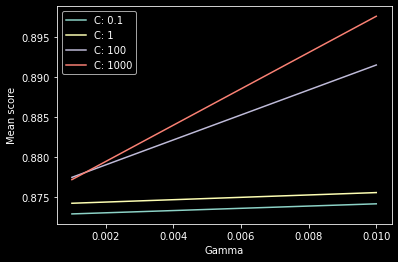


Classifier with best test set accuracy: SVC


In [26]:
# running whole process at once, model trainings with gridsearch
# finding best model with best parameters
# analyzing some of the paramaters and visualization
# this code is a sample for further works

for model_num, grid_search in enumerate(models):
    print(f"Model : {models_no[model_num]}")
    grid_search.fit(X_train, y_train)
    pred = grid_search.predict(X_test)
    print(f"Best parameters : {grid_search.best_params_}")
    print(f"GRID Accuracy : {grid_search.best_score_}")
    print(f"Test Accuracy  : {accuracy_score(y_test, pred)} ")
    # plotting inspired from https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    print([grid_search.cv_results_['mean_test_score']])
    # print([grid_search.cv_results_['std_test_score']]) # comment out for detail grid score output
    if model_num == 1:
        scores = grid_search.cv_results_['mean_test_score']
        scores = np.array(scores).reshape(len(c_range), len(gamma))
        for ind, i in enumerate(c_range):
            plt.plot(gamma, scores[ind], label='C: ' + str(i))
        plt.legend()
        plt.xlabel('Gamma')
        plt.ylabel('Mean score')
        plt.show()
        
    if accuracy_score(y_test, pred) > top_accuracy:
        top_accuracy = accuracy_score(y_test, pred)
        top_grid = grid_search
        top_classifier = model_num
print('\nClassifier with best test set accuracy: %s' % models_no[top_classifier])

In [27]:
#  training best model and getting best scores
svc = grid_search.best_estimator_
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
# print prediction results
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))

0.8974285441162413
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      3047
           1       0.71      0.36      0.48       868
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00      6159
           4       0.00      0.00      0.00       384

    accuracy                           0.90     10461
   macro avg       0.49      0.46      0.47     10461
weighted avg       0.87      0.90      0.87     10461



In [28]:
# Enes Çavuş - Hands-On Machine Learning practices

In [29]:
# ML - Training - GridSearch - PreProcessing - Prediction - Analyzing